In [16]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/20201.ai4eng/master/init.py
import init; init.init(force_download=False); init.get_weblink()

In [137]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                session_id="UDEA", 
                                                lab_id="L02.03" )
init.get_weblink()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from local.lib import timeseries as ts
import pandas as pd
import os
from IPython.display import Image
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

# A synthetic timeseries

retrieving data from existing 'timeseries_signal.csv'


/opt/anaconda2/envs/p37/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


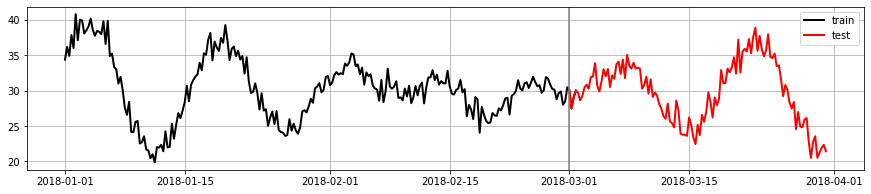

In [2]:

fname = "timeseries_signal.csv"
date_split = "2018-03-01"
if os.path.exists(fname):
    print ("retrieving data from existing '%s'"%fname)
    d = pd.read_csv(fname)
    d.index = pd.to_datetime(d.date)
    del(d["date"])
else:
    idx = pd.date_range("2018-01-01", "2018-03-31", freq="6h")
    i = np.linspace(-5,4,len(idx))
    t = np.log(i**2+.3)*np.cos(4*i)
    t += (np.random.normal(size=len(idx))*.4)
    t = np.round(t*3+30,3)
    d = pd.DataFrame(np.r_[[t]].T, columns=["signal"], index=idx) 
    d.index.name="date"
    d.to_csv(fname)
plt.figure(figsize=(15,3))
plt.plot(d[:date_split].index, d[:date_split].signal, color="black", lw="2", label="train"); 
plt.plot(d[date_split:].index, d[date_split:].signal, color="red", lw="2", label="test"); 
plt.axvline(date_split, color="grey"); plt.legend();plt.grid();
signal = d


In [ ]:
d.info()

In [ ]:
d

## Task 1. Build a time series training dataset

In this task, starting off from the time signal above, you must build an **anotated dataset** so that at any time instant **given the three last three signal values** we want to **predict the next one**.

You will have to:

- download the file `timeseries_signal.csv`
- add three columns named `signal-3`, `signal-2`, `signal-1`
- your dataset will now contain five columns, including the original `signal` and `date`
- therefore, yout dataset will contain three less rows than the original one.
- name your new dataset `timeseries_signal_dataset.csv` and upload it to the execution environment of this notebook.

**Example `timeseries_signal.csv`**, header + first 9 lines

    date,signal
    2018-01-01 00:00:00,32.545
    2018-01-01 06:00:00,34.662
    2018-01-01 12:00:00,36.161
    2018-01-01 18:00:00,38.875
    2018-01-02 00:00:00,38.552
    2018-01-02 06:00:00,35.347
    2018-01-02 12:00:00,37.656
    2018-01-02 18:00:00,38.301
    2018-01-03 00:00:00,37.378
    
**Example `timeseries_signal_dataset.csv`**, header + first 9 lines

    date,signal-3,signal-2,signal-1,signal
    2018-01-01 18:00:00,32.545,34.662,36.161,38.875
    2018-01-02 00:00:00,34.662,36.161,38.875,38.552
    2018-01-02 06:00:00,36.161,38.875,38.552,35.347
    2018-01-02 12:00:00,38.875,38.552,35.347,37.656
    2018-01-02 18:00:00,38.552,35.347,37.656,38.301
    2018-01-03 00:00:00,35.347,37.656,38.301,37.378
    2018-01-03 06:00:00,37.656,38.301,37.378,40.191
    2018-01-03 12:00:00,38.301,37.378,40.191,40.592
    2018-01-03 18:00:00,37.378,40.191,40.592,38.001


Observe that the first three dates in the original file are lost, since they have no three previous time instants.

In [4]:
!head timeseries_signal_dataset.csv

In [ ]:
dataset = pd.read_csv("timeseries_signal_dataset.csv", index_col="date")
dataset.head()

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Create a regression model and generate train and test predictions

now we split **your dataset** into two datasets, one for training and one for testing

In [ ]:
date_split = "2018-03-01"

dataset = pd.read_csv("timeseries_signal_dataset.csv", index_col="date")

dataset_train = dataset[:date_split]
dataset_train.to_csv("timeseries_train.csv", index=False)

dataset_test = dataset[date_split:]
dataset_test.to_csv("timeseries_test.csv", index=False)

In this task you will have to 

- implement in ORANGE the following workflow using as input the two files just generatd:
    - `timeseries_train.csv` for training the model
    - `timeseries_test.csv` for testing the model
- upload two files with the resulting predictions:
    - `timeseries_train_predictions.csv` with the train predictions
    - `timeseries_test_predictions.csv` with the test predictions
    

observe that:

- the files you generate will have **THREE PREDICTIONS** plus the signal plus the three time lags, and thus, seven columns. It is ok if the date is not present.
- the **signal** column is the target column.

the regressors parameters should be:
- **SVM**: C=1, epsilon=0.1, Kernel=RBF, g=auto, iteration limit=100, Numerical tolerance=0,0010
- **Linear Regression**: No regularization
- **Random Forest**: number of trees = 10, only check "do not split subsets smaller than"=5

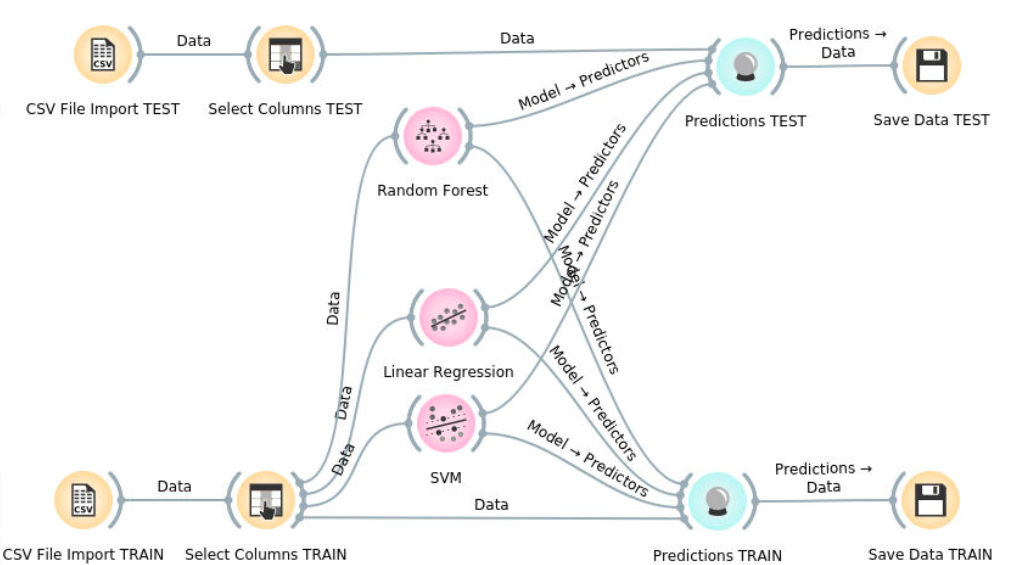

In [130]:
Image("local/imgs/orange_regression.png", width=800)

your datasets must have the structure such as in the following example. **NAME** the three regressors accordingly.

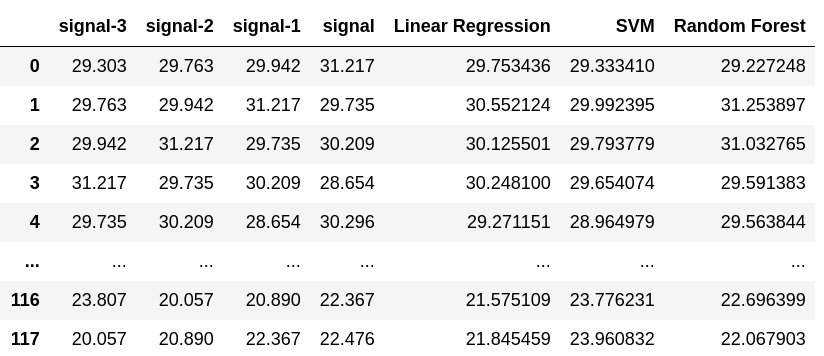

In [131]:
Image("local/imgs/regression_predictions.png", width=500)

In [ ]:
ptest  = pd.read_csv("timeseries_test_predictions.csv")
ptrain = pd.read_csv("timeseries_train_predictions.csv")

In [ ]:
ptest

In [ ]:
for i in ["Linear Regression", "SVM", "Random Forest"]:
    print ("%30s"%i, "%.3f"%np.sqrt(np.mean((ptest.signal-ptest[i])**2)))

In [ ]:
for i in ["Linear Regression", "SVM", "Random Forest"]:
    print ("%30s"%i, "%.3f"%np.sqrt(np.mean((ptrain.signal-ptrain[i])**2)))

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Measure trend prediction

You will now use the predictions from last task to measure **trend accuracy**:

- if **signal**>**signal-1** and ALSO your **prediction**>**signal-1**, then your model has a **correct tred prediction** regardless how different are **signal** and **prediction**
- if **signal**<=**signal-1** and ALSO your **prediction**<=**signal-1**, then your model has a **correct tred prediction** regardless how different are **signal** and **prediction**
- otherwise, your model has an **incorrect prediction**

another way to phrase is in terms of the signs of the differentials:

- is **signal**$-$**signal-1** nas the same sign as **prediction**$-$**signal-1**, then the trend prediction is correct, otherwise it is incorrect.

for instance, in the **first five rows** in following example

In [ ]:
Image("local/imgs/regression_predictions.png", width=500)

- **Linear Regression** misses the trend prediction in rows 0 and 3, obtaining a trend prediction accuracy of 60%, if we only consider the first five rows
- **SVM**: misses only the trend prediction of row 0, resulting in an accuracy of 80%
- **Random Forest**: misses the trend prediction in rows 0 and 1, resulting in an accuracy of 60%

In [ ]:
ptest  = pd.read_csv("timeseries_test_predictions.csv")
ptrain = pd.read_csv("timeseries_train_predictions.csv")

In [ ]:
ptest.head()

In [ ]:
# input here the trend accuracies in TRAIN predictions
tracc = {} 
tracc["Linear Regression"] = 
tracc["SVM"] = 
tracc["Random Forest"] = 

In [ ]:
# input here the trend accuracies in TEST predictions
tsacc = {} 
tsacc["Linear Regression"] = 
tsacc["SVM"] = 
tsacc["Random Forest"] = 

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_03");

observe now your predictions

In [ ]:
 
for m in ["Linear Regression", "SVM", "Random Forest"]:
    plt.figure(figsize=(15,3))
    plt.plot(range(0,len(ptrain)), ptrain.signal, color="black", lw="2", alpha=.3); 
    plt.plot(range(len(ptrain), len(ptrain)+len(ptest)), ptest.signal, color="red", lw="2", alpha=.3); 
    plt.plot(range(len(ptrain), len(ptrain)+len(ptest)), ptest[m], color="red", lw="2", label="test"); 
    plt.plot(range(0,len(ptrain)), ptrain[m], color="black", lw="2", label="test"); 
    plt.axvline(len(ptrain), color="grey"); plt.legend();plt.grid();
    plt.title(m+ "  ::  trend accuracy TRAIN: %.3f TEST: %.3f"%(tracc[m], tsacc[m]))


## Task 4: Manually apply a linear regression model

Apply the following linear regression model to manually obtain predictions from the original signal

$$\hat{y} = w_0 + w_1s_1 + w_2s_2 + w_3s_3$$

with:

- $w_0=-2$
- $w_1=0.2$
- $w_2=0.3$
- $w_3=0.6$

For instance, if your inputs are as the image below, your model prediction for the first two inputs (lines 0 and 1) would be 30.508 and 31.084 respectively

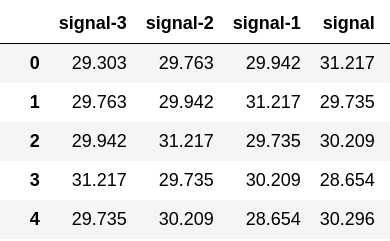

In [19]:
Image("local/imgs/regression_input.png", width=300)

you must generate a prediction for each row in your input dataset and create a comma separated list of predictions.

In [20]:
dataset = pd.read_csv("timeseries_signal_dataset.csv", index_col="date")
print ("dataset shape is", dataset.shape)
dataset.head()

In [ ]:
# for instance lr_preds = [31.77, 32.66, .... ]
lrpreds = [ .... ]

### suggestion: do it Python

observe how matrix multiplication and scalar addition works

In [21]:
w = np.r_[[0.6, 0.3, 0.2]]
signal = np.random.randint(10, size=(10,3))
print (signal)

In [22]:
signal.dot(w) + 2

and how you can extract a `numpy` matrix from a `pandas` dataframe with selected columns

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_04");

### you can see the model prediction

RMSE 1.893


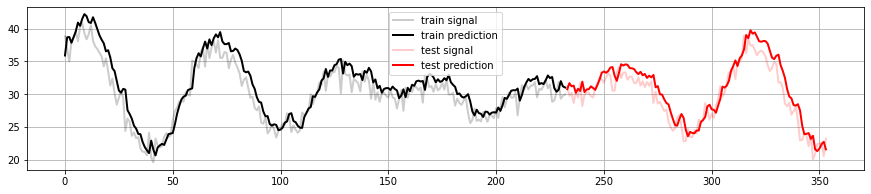

In [133]:

w0=-2
lr_train = ptrain.values[:,:3].dot(w)+w0
lr_test = ptest.values[:,:3].dot(w)+w0

print ("RMSE %.3f"%np.sqrt(np.mean((ptrain.signal-lr_train)**2)))
plt.figure(figsize=(15,3))
plt.plot(range(len(ptrain)), ptrain.signal, color="black", alpha=.2, lw=2, label="train signal")
plt.plot(range(len(ptrain)), lr_train, color="black", lw=2, label="train prediction")

plt.plot(range(len(ptrain),len(ptrain)+len(ptest)), ptest.signal, color="red", alpha=.2, lw=2, label="test signal")
plt.plot(range(len(ptrain),len(ptrain)+len(ptest)), lr_test, color="red", lw=2, label="test prediction")
plt.grid();
plt.legend();
